In [1]:
import pandas as pd
from sqlalchemy import create_engine

from sqlalchemy import create_engine

username = 'mia17-hackaton'
password = 'hackaton-mia17'
host = 'postgresql-mia17-hackaton.alwaysdata.net'
port = '5432'
database = 'mia17-hackaton_psql'

connection_url = f'postgresql://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(connection_url)

athletes_df = pd.read_sql("SELECT * FROM olympic_athletes;", con=engine)
hosts_df = pd.read_sql("SELECT * FROM olympic_hosts;", con=engine)
medals_df = pd.read_sql("SELECT * FROM olympic_medals;", con=engine)
results_df = pd.read_sql("SELECT * FROM olympic_results;", con=engine)


print("Colonnes de olympic_athletes :", athletes_df.columns)
print("Colonnes de olympic_hosts :", hosts_df.columns)
print("Colonnes de olympic_medals :", medals_df.columns)
print("Colonnes de olympic_results :", results_df.columns)

Colonnes de olympic_athletes : Index(['_id', 'athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio'],
      dtype='object')
Colonnes de olympic_hosts : Index(['_id', 'game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year'],
      dtype='object')
Colonnes de olympic_medals : Index(['_id', 'discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')
Colonnes de olympic_results : Index(['_id', 'discipline_title', 'event_title', 'slug_game',
       'participant_type', 'medal_type', 'athletes', 'rank_equal',
       'rank_position', 'country_name', 'country_code',
       'country_3_letter_code', 'athlete_url', 'athlete_full_name',
       'value_unit', 'value_type'],
      d

In [2]:
#les premières lignes de chaque DataFrame
print("Premières lignes de olympic_athletes:")
print(athletes_df.head())

print("\nPremières lignes de olympic_hosts:")
print(hosts_df.head())

print("\nPremières lignes de olympic_medals:")
print(medals_df.head())

print("\nPremières lignes de olympic_results:")
print(results_df.head())

# Statistiques descriptives pour identifier les valeurs manquantes et aberrantes
print("\nStatistiques descriptives de olympic_athletes:")
print(athletes_df.describe(include='all'))

print("\nStatistiques descriptives de olympic_hosts:")
print(hosts_df.describe(include='all'))

print("\nStatistiques descriptives de olympic_medals:")
print(medals_df.describe(include='all'))

print("\nStatistiques descriptives de olympic_results:")
print(results_df.describe(include='all'))
# faire une fonction pour reduire (decribe)

Premières lignes de olympic_athletes:
     _id                                        athlete_url  \
0  24603  https://olympics.com/en/athletes/petit-jesus-n...   
1  24604  https://olympics.com/en/athletes/hamid-ait-big...   
2  24605  https://olympics.com/en/athletes/abner-mares-m...   
3  24606    https://olympics.com/en/athletes/argenis-mendez   
4  24607      https://olympics.com/en/athletes/joel-brunker   

       athlete_full_name  games_participations   first_game  \
0  Petit Jesus NGNITEDEM                     1  Athens 2004   
1     Hamid AIT BIGHRADE                     1  Athens 2004   
2   Abner MARES MARTINEZ                     1  Athens 2004   
3         Argenis MENDEZ                     1  Athens 2004   
4           Joel BRUNKER                     1  Athens 2004   

  athlete_year_birth athlete_medals   bio  
0               None           None  None  
1               None           None  None  
2               None           None  None  
3               None        

In [3]:
import numpy as np

#None par NaN pour faciliter le remplissage
athletes_df.replace('None', np.nan, inplace=True)
hosts_df.replace('None', np.nan, inplace=True)
medals_df.replace('None', np.nan, inplace=True)
results_df.replace('None', np.nan, inplace=True)

# Remplacer les valeurs manquantes par la médiane pour les colonnes numériques
athletes_df.fillna(athletes_df.median(numeric_only=True), inplace=True)
hosts_df.fillna(hosts_df.median(numeric_only=True), inplace=True)
medals_df.fillna(medals_df.median(numeric_only=True), inplace=True)
results_df.fillna(results_df.median(numeric_only=True), inplace=True)

# Remplacer les valeurs manquantes par le mode pour les colonnes catégorielles
athletes_df.fillna(athletes_df.mode().iloc[0], inplace=True)
hosts_df.fillna(hosts_df.mode().iloc[0], inplace=True)
medals_df.fillna(medals_df.mode().iloc[0], inplace=True)
results_df.fillna(results_df.mode().iloc[0], inplace=True)

C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\3329969968.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  athletes_df.fillna(athletes_df.mode().iloc[0], inplace=True)
C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\3329969968.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_df.fillna(results_df.mode().iloc[0], inplace=True)


In [4]:
# Extraire les noms de pays
athletes_countries = athletes_df['country_name'].dropna().unique() if 'country_name' in athletes_df.columns else []
medals_countries = medals_df['country_name'].dropna().unique() if 'country_name' in medals_df.columns else []
results_countries = results_df['country_name'].dropna().unique() if 'country_name' in results_df.columns else []

# Afficher les noms de pays uniques
print("Noms de pays dans olympic_athletes :")
print(athletes_countries)

print("\nNoms de pays dans olympic_medals :")
print(medals_countries)

print("\nNoms de pays dans olympic_results :")
print(results_countries)


Noms de pays dans olympic_athletes :
[]

Noms de pays dans olympic_medals :
['Italy' 'Norway' 'Sweden' 'Great Britain' 'Japan' 'Canada' 'New Zealand'
 'United States of America' 'ROC' 'Switzerland'
 "People's Republic of China" 'France' 'Australia' 'Germany' 'Ukraine'
 'Belarus' 'Estonia' 'Netherlands' 'Hungary' 'Republic of Korea' 'Belgium'
 'Spain' 'Slovenia' 'Austria' 'Czech Republic' 'Poland' 'Latvia' 'Finland'
 'Slovakia' 'Fiji' 'San Marino' 'Serbia' 'Cuba' 'Bulgaria'
 'Islamic Republic of Iran' 'Kuwait' 'Denmark' 'Mexico'
 'Republic of Moldova' 'Brazil' 'Portugal' 'Ecuador' 'Ireland'
 'Philippines' 'Kazakhstan' 'Uzbekistan' 'Azerbaijan' 'Ghana' 'Thailand'
 'Turkey' 'India' 'Chinese Taipei' 'Armenia' 'Argentina' 'Colombia'
 'Bermuda' 'South Africa' 'Hong Kong, China' 'Egypt' 'Jordan' 'Croatia'
 'North Macedonia' "Côte d'Ivoire" 'Tunisia' 'Israel' 'Malaysia' 'Romania'
 'Indonesia' 'Greece' 'Mongolia' 'Kyrgyzstan' 'Nigeria' 'Georgia'
 'Venezuela' 'Kosovo' 'Dominican Republic' 'Syria

In [5]:
#changements de noms de pays et des anomalies
def update_country_names(df):
    country_replacements = {
        'Soviet Union': 'Russia',
        'Yugoslavia': 'Serbia',
        'German Democratic Republic (Germany)': 'Germany',
        'Federal Republic of Germany': 'Germany',
        'Czechoslovakia': 'Czech Republic',
        'Unified Team': 'Russia',
        'ROC': 'Russia',
        'Olympic Athletes from Russia': 'Russia',
        'United Arab Republic': 'Egypt',
        'West Indies Federation': 'Jamaica',
        'Bohemia': 'Czech Republic',
        'Korea Team': 'Korea',
        'Malaya': 'Malaysia',
        }

    # Nettoyage des anomalies (par exemple, suppression des URLs)
    df['country_name'] = df['country_name'].replace(country_replacements)
    df['country_name'] = df['country_name'].str.replace(r".*https?://.*", "", regex=True)
    df['country_name'] = df['country_name'].str.strip()

    return df

# Appliquer les remplacements sur les DataFrames concernés
medals_df = update_country_names(medals_df)
results_df = update_country_names(results_df)

# Afficher les noms de pays nettoyés pour vérification
print("\nNoms de pays nettoyés dans olympic_medals :")
print(medals_df['country_name'].unique())

print("\nNoms de pays nettoyés dans olympic_results :")
print(results_df['country_name'].unique())



Noms de pays nettoyés dans olympic_medals :
['Italy' 'Norway' 'Sweden' 'Great Britain' 'Japan' 'Canada' 'New Zealand'
 'United States of America' 'Russia' 'Switzerland'
 "People's Republic of China" 'France' 'Australia' 'Germany' 'Ukraine'
 'Belarus' 'Estonia' 'Netherlands' 'Hungary' 'Republic of Korea' 'Belgium'
 'Spain' 'Slovenia' 'Austria' 'Czech Republic' 'Poland' 'Latvia' 'Finland'
 'Slovakia' 'Fiji' 'San Marino' 'Serbia' 'Cuba' 'Bulgaria'
 'Islamic Republic of Iran' 'Kuwait' 'Denmark' 'Mexico'
 'Republic of Moldova' 'Brazil' 'Portugal' 'Ecuador' 'Ireland'
 'Philippines' 'Kazakhstan' 'Uzbekistan' 'Azerbaijan' 'Ghana' 'Thailand'
 'Turkey' 'India' 'Chinese Taipei' 'Armenia' 'Argentina' 'Colombia'
 'Bermuda' 'South Africa' 'Hong Kong, China' 'Egypt' 'Jordan' 'Croatia'
 'North Macedonia' "Côte d'Ivoire" 'Tunisia' 'Israel' 'Malaysia' 'Romania'
 'Indonesia' 'Greece' 'Mongolia' 'Kyrgyzstan' 'Nigeria' 'Georgia'
 'Venezuela' 'Kosovo' 'Dominican Republic' 'Syrian Arab Republic'
 'Turkmenis

In [6]:
#premières lignes de chaque DataFrame nettoyé
print("\nPremières lignes de olympic_athletes après nettoyage :")
print(athletes_df.head())

print("\nPremières lignes de olympic_hosts après nettoyage :")
print(hosts_df.head())

print("\nPremières lignes de olympic_medals après nettoyage :")
print(medals_df.head())

print("\nPremières lignes de olympic_results après nettoyage :")
print(results_df.head())

# Résumé des valeurs manquantes
print("\nRésumé des valeurs manquantes dans olympic_athletes :")
print(athletes_df.isnull().sum())

print("\nRésumé des valeurs manquantes dans olympic_hosts :")
print(hosts_df.isnull().sum())

print("\nRésumé des valeurs manquantes dans olympic_medals :")
print(medals_df.isnull().sum())

print("\nRésumé des valeurs manquantes dans olympic_results :")
print(results_df.isnull().sum())

# Vérification des noms de pays uniques après nettoyage
print("\nNoms de pays uniques dans olympic_medals après nettoyage :")
print(medals_df['country_name'].unique())

print("\nNoms de pays uniques dans olympic_results après nettoyage :")
print(results_df['country_name'].unique())



Premières lignes de olympic_athletes après nettoyage :
     _id                                        athlete_url  \
0  24603  https://olympics.com/en/athletes/petit-jesus-n...   
1  24604  https://olympics.com/en/athletes/hamid-ait-big...   
2  24605  https://olympics.com/en/athletes/abner-mares-m...   
3  24606    https://olympics.com/en/athletes/argenis-mendez   
4  24607      https://olympics.com/en/athletes/joel-brunker   

       athlete_full_name  games_participations   first_game  \
0  Petit Jesus NGNITEDEM                     1  Athens 2004   
1     Hamid AIT BIGHRADE                     1  Athens 2004   
2   Abner MARES MARTINEZ                     1  Athens 2004   
3         Argenis MENDEZ                     1  Athens 2004   
4           Joel BRUNKER                     1  Athens 2004   

   athlete_year_birth athlete_medals                            bio  
0                 NaN             1B  Personal Best: Mar – unknown.  
1                 NaN             1B  Personal

In [7]:
# Fonction de nettoyage des noms de pays
def final_clean_country_names(df):
    country_replacements = {
        'Soviet Union': 'Russia',
        'Yugoslavia': 'Serbia',
        'German Democratic Republic (Germany)': 'Germany',
        'Federal Republic of Germany': 'Germany',
        'Czechoslovakia': 'Czech Republic',
        'Unified Team': 'Russia',
        'ROC': 'Russia',
        'Olympic Athletes from Russia': 'Russia',
        'United Arab Republic': 'Egypt',
        'West Indies Federation': 'Jamaica',
        'Bohemia': 'Czech Republic',
        'Korea Team': 'Korea',
        'Malaya': 'Malaysia',
        'Côte d\'Ivoire': 'Ivory Coast',
        'Democratic Republic of Timor-Leste': 'East Timor',
        'The Former Yugoslav Republic of Macedonia': 'North Macedonia'        
    }

    # Nettoyage des anomalies 
    df['country_name'] = df['country_name'].replace(country_replacements)
    df['country_name'] = df['country_name'].str.replace(r".*https?://.*", "", regex=True)
    df['country_name'] = df['country_name'].str.strip()
    df['country_name'] = df['country_name'].replace({
        'None)]"': np.nan, '10': np.nan, '25': np.nan, '17': np.nan, '14': np.nan, '5': np.nan, '3': np.nan, '11': np.nan, '1': np.nan, '16': np.nan, '': np.nan, "Jr.'": np.nan, "CÃ´te d'Ivoire": "Ivory Coast"
    })

    return df

# Appliquer le nettoyage sur les DataFrames concernés
medals_df = final_clean_country_names(medals_df)
results_df = final_clean_country_names(results_df)

# Vérifier les noms de pays uniques après le nettoyage
print("\nNoms de pays uniques dans olympic_medals après le nettoyage final :")
print(medals_df['country_name'].dropna().unique())





Noms de pays uniques dans olympic_medals après le nettoyage final :
['Italy' 'Norway' 'Sweden' 'Great Britain' 'Japan' 'Canada' 'New Zealand'
 'United States of America' 'Russia' 'Switzerland'
 "People's Republic of China" 'France' 'Australia' 'Germany' 'Ukraine'
 'Belarus' 'Estonia' 'Netherlands' 'Hungary' 'Republic of Korea' 'Belgium'
 'Spain' 'Slovenia' 'Austria' 'Czech Republic' 'Poland' 'Latvia' 'Finland'
 'Slovakia' 'Fiji' 'San Marino' 'Serbia' 'Cuba' 'Bulgaria'
 'Islamic Republic of Iran' 'Kuwait' 'Denmark' 'Mexico'
 'Republic of Moldova' 'Brazil' 'Portugal' 'Ecuador' 'Ireland'
 'Philippines' 'Kazakhstan' 'Uzbekistan' 'Azerbaijan' 'Ghana' 'Thailand'
 'Turkey' 'India' 'Chinese Taipei' 'Armenia' 'Argentina' 'Colombia'
 'Bermuda' 'South Africa' 'Hong Kong, China' 'Egypt' 'Jordan' 'Croatia'
 'North Macedonia' 'Ivory Coast' 'Tunisia' 'Israel' 'Malaysia' 'Romania'
 'Indonesia' 'Greece' 'Mongolia' 'Kyrgyzstan' 'Nigeria' 'Georgia'
 'Venezuela' 'Kosovo' 'Dominican Republic' 'Syrian Arab

###Préparation des Données pour le Machine Learning###

In [8]:
from sklearn.preprocessing import LabelEncoder

# Sélection des caractéristiques pertinentes
athletes_features = athletes_df[['athlete_full_name', 'games_participations', 'athlete_medals']]
hosts_features = hosts_df[['game_name', 'game_season', 'game_year']]
medals_features = medals_df[['discipline_title', 'event_title', 'event_gender', 'medal_type', 'country_name']]
results_features = results_df[['discipline_title', 'event_title', 'participant_type', 'medal_type', 'country_name']]

# Fonction pour encoder les variables catégorielles en utilisant LabelEncoder
def encode_features(df, columns):
    label_encoders = {}
    for column in columns:
        if column in df.columns:
            label_encoders[column] = LabelEncoder()
            df.loc[:, column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders

# Encoder les variables catégorielles pour chaque DataFrame
athletes_features, athletes_encoders = encode_features(athletes_features, ['athlete_full_name', 'athlete_medals'])
hosts_features, hosts_encoders = encode_features(hosts_features, ['game_name', 'game_season'])
medals_features, medals_encoders = encode_features(medals_features, ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'country_name'])
results_features, results_encoders = encode_features(results_features, ['discipline_title', 'event_title', 'participant_type', 'medal_type', 'country_name'])

# Afficher un échantillon des données transformées
print("\nÉchantillon des caractéristiques des athlètes après encodage :")
print(athletes_features.head())

print("\nÉchantillon des caractéristiques des hôtes après encodage :")
print(hosts_features.head())

print("\nÉchantillon des caractéristiques des médailles après encodage :")
print(medals_features.head())

print("\nÉchantillon des caractéristiques des résultats après encodage :")
print(results_features.head())



Échantillon des caractéristiques des athlètes après encodage :
  athlete_full_name  games_participations athlete_medals
0             56462                     1              0
1             25763                     1              0
2               305                     1              0
3              6458                     1              0
4             33956                     1              0

Échantillon des caractéristiques des hôtes après encodage :
  game_name game_season  game_year
0         8           1       2022
1        50           0       2020
2        35           1       2018
3        36           0       2016
4        42           1       2014

Échantillon des caractéristiques des médailles après encodage :
  discipline_title event_title event_gender medal_type country_name
0               21         911            1          1           61
1               21         911            1          1           61
2               21         911            1          2

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Diviser les données en ensembles d'entraînement et de test
# Utilisons les features de results_features pour la prédiction des types de médailles

X = results_features.drop('medal_type', axis=1)  # Features
y = results_features['medal_type']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print(f"Entraînement: {X_train.shape}, Test: {X_test.shape}")


Entraînement: (130243, 4), Test: (32561, 4)


In [10]:
# Assurer que la cible est catégorique
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Vérification après conversion
print(y_train.dtype)
print(y_train.head())


int32
158111    0
138114    0
22752     0
103136    0
103436    0
Name: medal_type, dtype: int32


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Diviser les données en ensembles d'entraînement et de test
X = results_features.drop('medal_type', axis=1)  # Features
y = results_features['medal_type']  # Target

# Conversion des cibles en type int
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9110592426522527
Confusion Matrix:
[[29487   199   215]
 [ 1196   144    54]
 [ 1161    71    34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     29901
           1       0.35      0.10      0.16      1394
           2       0.11      0.03      0.04      1266

    accuracy                           0.91     32561
   macro avg       0.46      0.37      0.39     32561
weighted avg       0.87      0.91      0.89     32561



In [12]:
# Décoder les prédictions
decoded_y_test = results_encoders['medal_type'].inverse_transform(y_test)
decoded_y_pred = results_encoders['medal_type'].inverse_transform(y_pred)

# Afficher quelques prédictions décodées pour vérification
print("\nÉchantillon des prédictions décodées :")
for true, pred in zip(decoded_y_test[:10], decoded_y_pred[:10]):
    print(f"Vrai: {true}, Prédit: {pred}")



Échantillon des prédictions décodées :
Vrai: BRONZE, Prédit: BRONZE
Vrai: GOLD, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE
Vrai: BRONZE, Prédit: BRONZE


In [13]:
# Entraîner le modèle avec ajustement des poids de classe
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10, 2: 10})
rf_model_weighted.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_weighted = rf_model_weighted.predict(X_test)

# Évaluation du modèle
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

print(f"Accuracy with Class Weight Adjustment: {accuracy_weighted}")
print("Confusion Matrix with Class Weight Adjustment:")
print(conf_matrix_weighted)
print("Classification Report with Class Weight Adjustment:")
print(class_report_weighted)


Accuracy with Class Weight Adjustment: 0.8201222321181781
Confusion Matrix with Class Weight Adjustment:
[[26088  1872  1941]
 [  718   391   285]
 [  733   308   225]]
Classification Report with Class Weight Adjustment:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     29901
           1       0.15      0.28      0.20      1394
           2       0.09      0.18      0.12      1266

    accuracy                           0.82     32561
   macro avg       0.40      0.44      0.41     32561
weighted avg       0.88      0.82      0.85     32561



In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convertir les données en format DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Paramètres de XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'mlogloss',
    'scale_pos_weight': {0: 1, 1: 10, 2: 10}  # Ajustement des poids de classe
}

# Entraîner le modèle XGBoost
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Prédire sur l'ensemble de test
y_pred_xgb = bst.predict(dtest)

# Évaluation du modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy with XGBoost: {accuracy_xgb}")
print("Confusion Matrix with XGBoost:")
print(conf_matrix_xgb)
print("Classification Report with XGBoost:")
print(class_report_xgb)



# L'erreur indique que certaines colonnes de votre DataFrame X_train et X_test sont de type object, ce qui n'est pas compatible avec XGBoost

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:discipline_title: object, event_title: object, participant_type: object, country_name: object

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# convertir les colonnes catégorielles en types numériques
label_encoders = {}
for column in results_features.columns:
    if results_features[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        results_features[column] = label_encoders[column].fit_transform(results_features[column])

# Vérifier les types de données après encodage
print(results_features.dtypes)

# Diviser les données en ensembles d'entraînement et de test
X = results_features.drop('medal_type', axis=1)  # Features
y = results_features['medal_type']  # Target

# Conversion des cibles en type int
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les dimensions des ensembles d'entraînement et de test
print(f"Entraînement: {X_train.shape}, Test: {X_test.shape}")


discipline_title    int32
event_title         int32
participant_type    int32
medal_type          int32
country_name        int32
dtype: object
Entraînement: (130243, 4), Test: (32561, 4)


C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\3411082805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_features[column] = label_encoders[column].fit_transform(results_features[column])
C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\3411082805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_features[column] = label_encoders[column].fit_transform(results_features[column])
C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\3411082805.py:9: SettingWithCopyWarning: 
A value is trying

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convertir les données en format DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Paramètres de XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'mlogloss'
}

# Entraîner le modèle XGBoost
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Prédire sur l'ensemble de test
y_pred_xgb = bst.predict(dtest)

# Évaluation du modèle
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy with XGBoost: {accuracy_xgb}")
print("Confusion Matrix with XGBoost:")
print(conf_matrix_xgb)
print("Classification Report with XGBoost:")
print(class_report_xgb)


bst.save_model('xgb_model.json')

Accuracy with XGBoost: 0.9195356407972728
Confusion Matrix with XGBoost:
[[29881    19     1]
 [ 1336    58     0]
 [ 1248    16     2]]
Classification Report with XGBoost:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     29901
           1       0.62      0.04      0.08      1394
           2       0.67      0.00      0.00      1266

    accuracy                           0.92     32561
   macro avg       0.74      0.35      0.35     32561
weighted avg       0.90      0.92      0.88     32561



In [24]:
# Entraîner le modèle avec ajustement des poids de classe
rf_model_weighted = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10, 2: 10})
rf_model_weighted.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_weighted = rf_model_weighted.predict(X_test)

# Évaluation du modèle
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

print(f"Accuracy with Class Weight Adjustment: {accuracy_weighted}")
print("Confusion Matrix with Class Weight Adjustment:")
print(conf_matrix_weighted)
print("Classification Report with Class Weight Adjustment:")
print(class_report_weighted)


Accuracy with Class Weight Adjustment: 0.8201222321181781
Confusion Matrix with Class Weight Adjustment:
[[26088  1872  1941]
 [  718   391   285]
 [  733   308   225]]
Classification Report with Class Weight Adjustment:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     29901
           1       0.15      0.28      0.20      1394
           2       0.09      0.18      0.12      1266

    accuracy                           0.82     32561
   macro avg       0.40      0.44      0.41     32561
weighted avg       0.88      0.82      0.85     32561



In [25]:
import joblib

# Sauvegarder le modèle entraîné
model_filename = 'rf_model_weighted.joblib'
joblib.dump(rf_model_weighted, model_filename)

print(f"Modèle sauvegardé sous le nom : {model_filename}")


Modèle sauvegardé sous le nom : rf_model_weighted.joblib


C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\1420496777.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


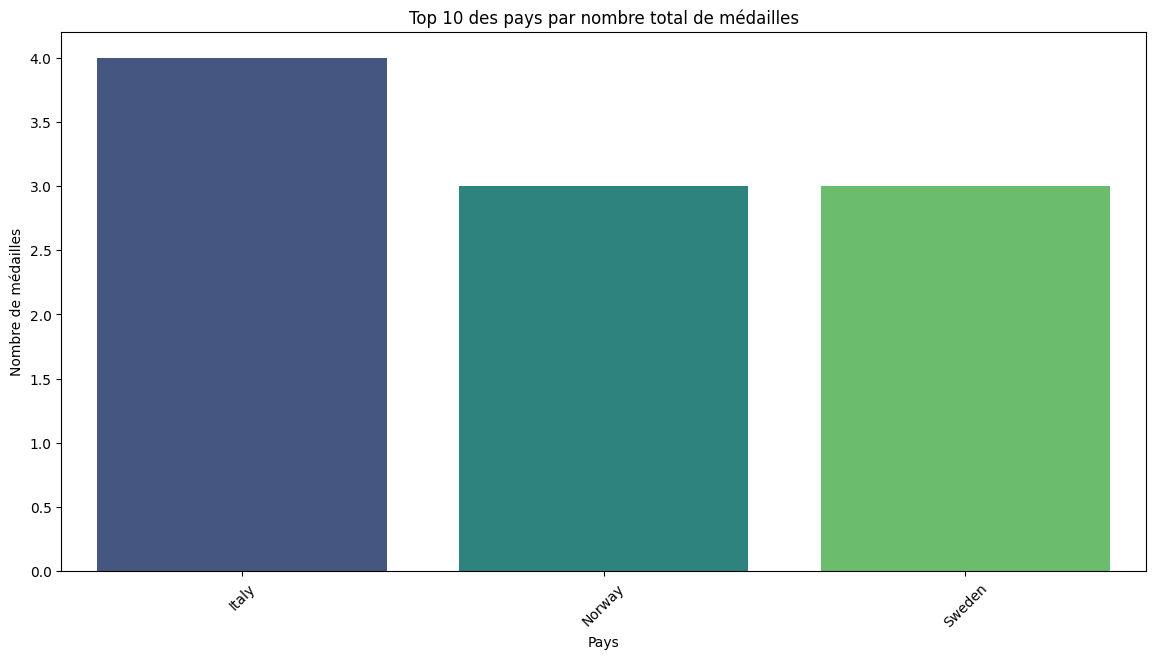

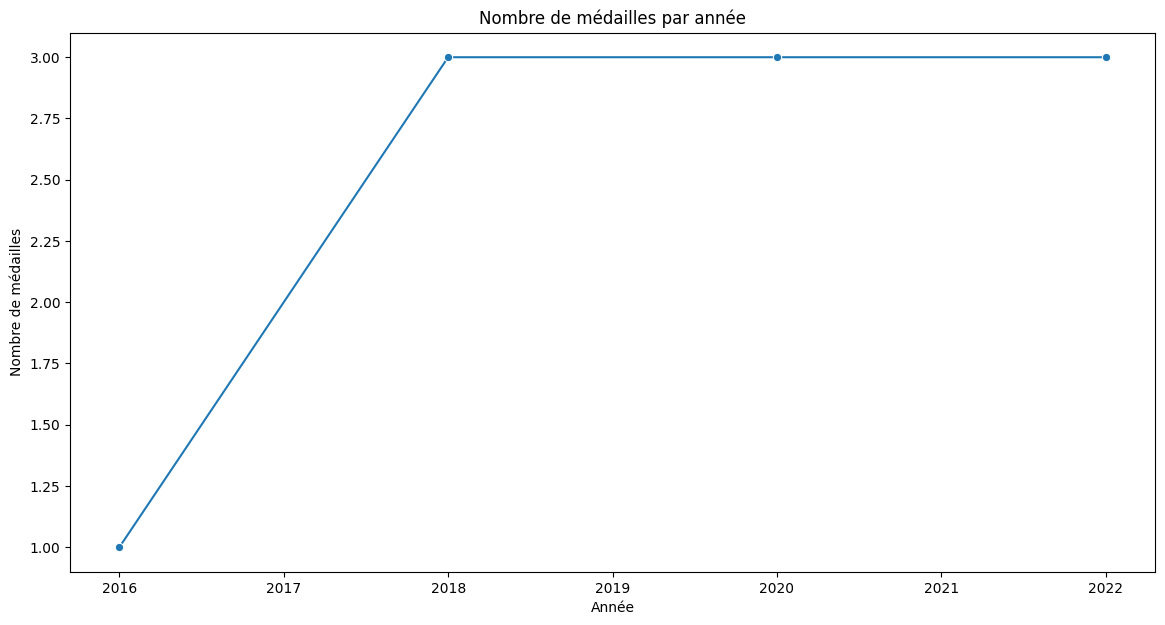

C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\1420496777.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_per_games.index, y=medals_per_games.values, palette='viridis')


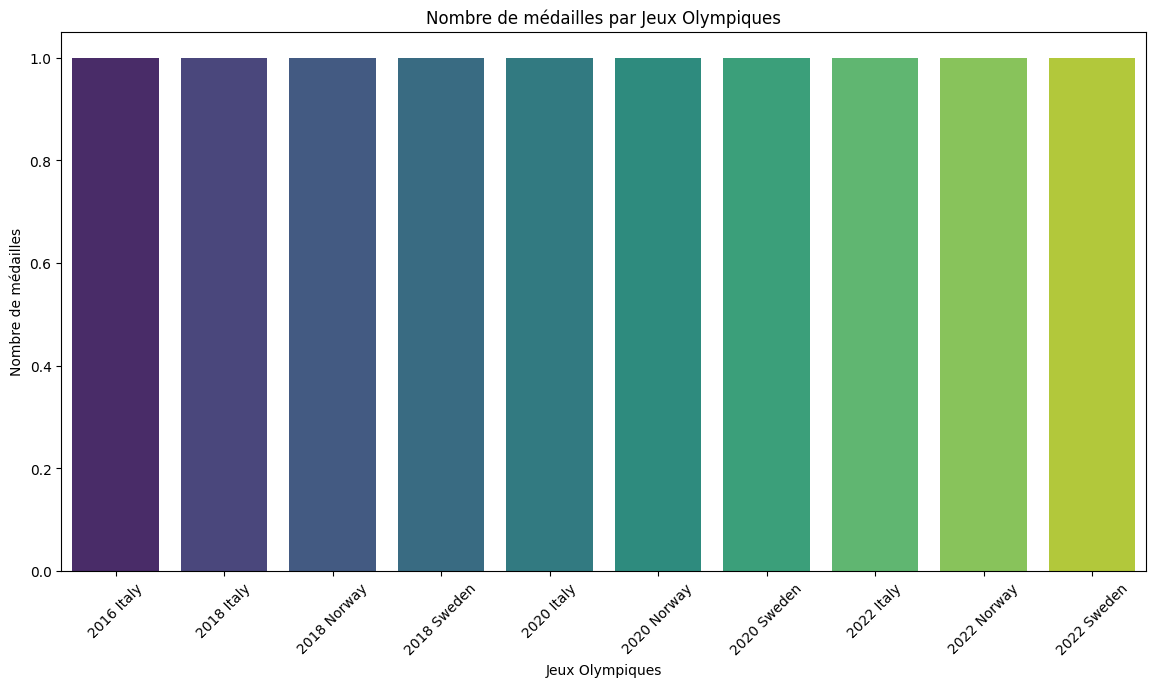

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Équipes avec le plus de médailles
plt.figure(figsize=(14, 7))
top_countries = data['country_name'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 des pays par nombre total de médailles')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.show()

# Nombre de médailles par année
plt.figure(figsize=(14, 7))
medals_per_year = data.groupby('game_year').size()
sns.lineplot(x=medals_per_year.index, y=medals_per_year.values, marker='o')
plt.title('Nombre de médailles par année')
plt.xlabel('Année')
plt.ylabel('Nombre de médailles')
plt.show()

# Nombre de médailles par jeux
plt.figure(figsize=(14, 7))
data['games'] = data['game_year'].astype(str) + ' ' + data['country_name']  # Créer une colonne pour représenter chaque jeux
medals_per_games = data.groupby('games').size()
sns.barplot(x=medals_per_games.index, y=medals_per_games.values, palette='viridis')
plt.title('Nombre de médailles par Jeux Olympiques')
plt.xlabel('Jeux Olympiques')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.show()



Échantillon des caractéristiques des athlètes après encodage :
   athlete_full_name  games_participations  athlete_medals
0                  0                     3               1
1                  1                     2               2
2                  2                     4               0

Échantillon des caractéristiques des hôtes après encodage :
   game_name  game_season  game_year
0          0            1       2022
1          2            0       2020
2          1            0       2016

Échantillon des caractéristiques des médailles après encodage :
   discipline_title  event_title  event_gender  medal_type  country_name
0                 0            0             2           1             0
1                 2            1             1           2             1
2                 1            2             0           0             2

Échantillon des caractéristiques des résultats après encodage :
   discipline_title  event_title  participant_type  medal_type  count

C:\Users\12mou\AppData\Local\Temp\ipykernel_4388\1924655356.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


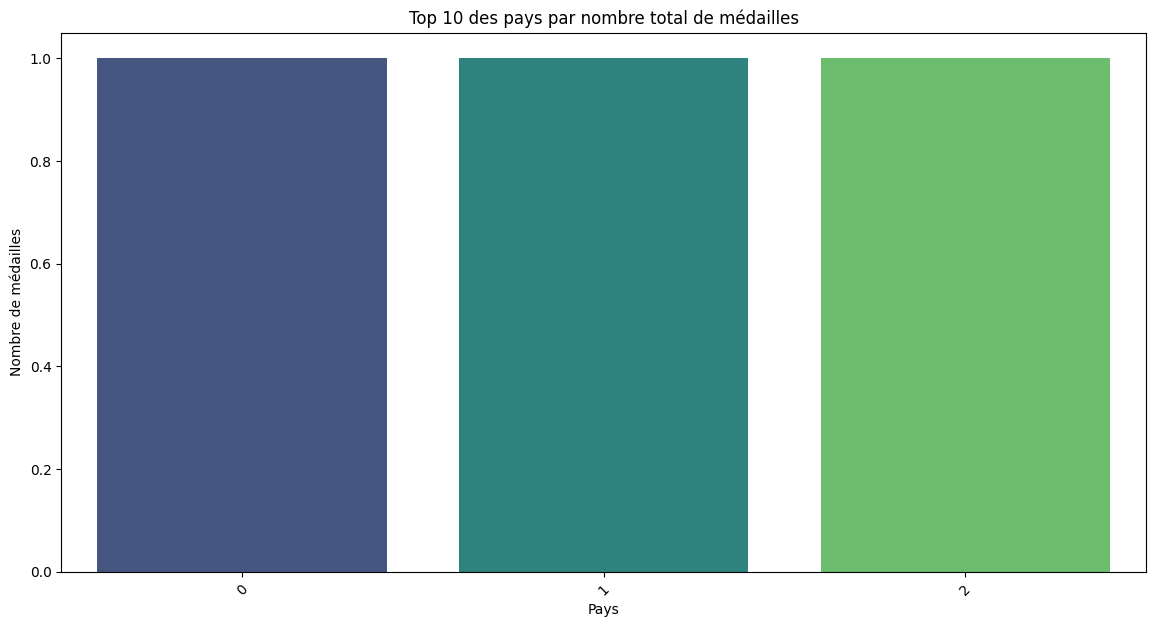

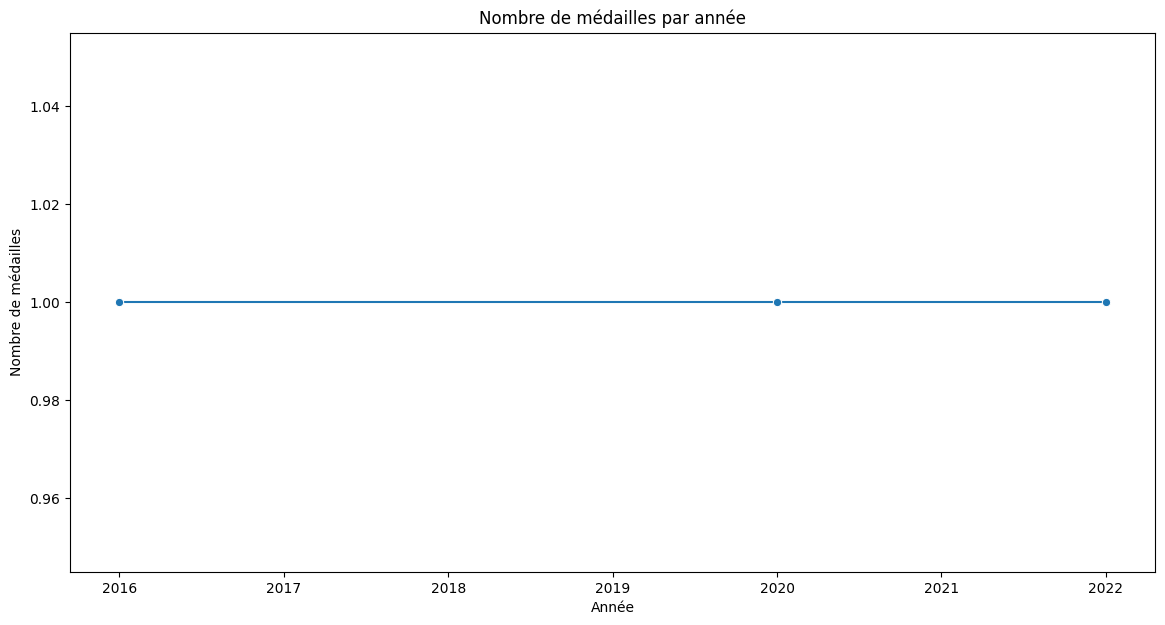

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U1')) -> None

<Figure size 1400x700 with 0 Axes>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Supposons que les données sont chargées dans des DataFrames appelés athletes_df, hosts_df, medals_df, results_df
# Charger les données (à remplacer par le code de chargement réel)
# athletes_df = pd.read_csv('path_to_athletes.csv')
# hosts_df = pd.read_csv('path_to_hosts.csv')
# medals_df = pd.read_csv('path_to_medals.csv')
# results_df = pd.read_csv('path_to_results.csv')

# Échantillon des données pour cette démonstration
athletes_df = pd.DataFrame({
    'athlete_full_name': ['Athlete A', 'Athlete B', 'Athlete C'],
    'games_participations': [3, 2, 4],
    'athlete_medals': ['Gold', 'Silver', 'Bronze']
})
hosts_df = pd.DataFrame({
    'game_name': ['Beijing 2022', 'Tokyo 2020', 'Rio 2016'],
    'game_season': ['Winter', 'Summer', 'Summer'],
    'game_year': [2022, 2020, 2016]
})
medals_df = pd.DataFrame({
    'discipline_title': ['Curling', 'Skiing', 'Running'],
    'event_title': ['Event 1', 'Event 2', 'Event 3'],
    'event_gender': ['Mixed', 'Male', 'Female'],
    'medal_type': ['Gold', 'Silver', 'Bronze'],
    'country_name': ['Country A', 'Country B', 'Country C']
})
results_df = pd.DataFrame({
    'discipline_title': ['Fencing', 'Fencing', 'Fencing'],
    'event_title': ['Event 1', 'Event 2', 'Event 3'],
    'participant_type': ['Individual', 'Team', 'Individual'],
    'medal_type': ['Gold', 'Silver', 'Bronze'],
    'country_name': ['Country A', 'Country B', 'Country C']
})

# Sélection des caractéristiques pertinentes
athletes_features = athletes_df[['athlete_full_name', 'games_participations', 'athlete_medals']]
hosts_features = hosts_df[['game_name', 'game_season', 'game_year']]
medals_features = medals_df[['discipline_title', 'event_title', 'event_gender', 'medal_type', 'country_name']]
results_features = results_df[['discipline_title', 'event_title', 'participant_type', 'medal_type', 'country_name']]

# Fonction pour encoder les variables catégorielles en utilisant LabelEncoder
def encode_features(df, columns):
    label_encoders = {}
    for column in columns:
        if column in df.columns:
            label_encoders[column] = LabelEncoder()
            df[column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders

# Encoder les variables catégorielles pour chaque DataFrame
athletes_features, athletes_encoders = encode_features(athletes_features, ['athlete_full_name', 'athlete_medals'])
hosts_features, hosts_encoders = encode_features(hosts_features, ['game_name', 'game_season'])
medals_features, medals_encoders = encode_features(medals_features, ['discipline_title', 'event_title', 'event_gender', 'medal_type', 'country_name'])
results_features, results_encoders = encode_features(results_features, ['discipline_title', 'event_title', 'participant_type', 'medal_type', 'country_name'])

# Afficher un échantillon des données transformées
print("\nÉchantillon des caractéristiques des athlètes après encodage :")
print(athletes_features.head())
print("\nÉchantillon des caractéristiques des hôtes après encodage :")
print(hosts_features.head())
print("\nÉchantillon des caractéristiques des médailles après encodage :")
print(medals_features.head())
print("\nÉchantillon des caractéristiques des résultats après encodage :")
print(results_features.head())

# Création des visualisations

# Équipes avec le plus de médailles
plt.figure(figsize=(14, 7))
top_countries = medals_features['country_name'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 des pays par nombre total de médailles')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.show()

# Nombre de médailles par année
plt.figure(figsize=(14, 7))
medals_per_year = hosts_features['game_year'].value_counts().sort_index()
sns.lineplot(x=medals_per_year.index, y=medals_per_year.values, marker='o')
plt.title('Nombre de médailles par année')
plt.xlabel('Année')
plt.ylabel('Nombre de médailles')
plt.show()

# Nombre de médailles par jeux
plt.figure(figsize=(14, 7))
hosts_features['games'] = hosts_features['game_name'] + ' ' + hosts_features['game_year'].astype(str)
medals_per_games = hosts_features['games'].value_counts().sort_index()
sns.barplot(x=medals_per_games.index, y=medals_per_games.values, palette='viridis')
plt.title('Nombre de médailles par Jeux Olympiques')
plt.xlabel('Jeux Olympiques')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.show()
